<a href="https://colab.research.google.com/github/Anushka-Sarkar/Recommender-System-Using-Colab/blob/main/Anime_Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
anime=pd.read_csv(r"/content/anime.csv")
rating=pd.read_csv(r"/content/rating.csv")

In [12]:
anime.shape

(12294, 7)

In [13]:
rating.shape

(161719, 3)

In [14]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [15]:
rating.head()

,user_id,anime_id,rating
0,1,20.0,-1.0
1,1,24.0,-1.0
2,1,79.0,-1.0
3,1,226.0,-1.0
4,1,241.0,-1.0


In [16]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [17]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161719 entries, 0 to 161718
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   161719 non-null  int64  
 1   anime_id  161718 non-null  float64
 2   rating    161718 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 3.7 MB


In [18]:
anime.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [19]:
rating.describe()

,user_id,anime_id,rating
count,161719.000000,161718.000000,161718.000000
mean,832.141999,11161.845979,6.055114
std,459.950251,9201.535196,3.834493
min,1.000000,1.000000,-1.000000
25%,439.000000,2787.000000,5.000000
50%,823.000000,9936.000000,7.000000
75%,1224.000000,17265.000000,9.000000
max,1602.000000,34240.000000,10.000000


In [20]:
anime.isnull().sum()

,0
anime_id,0
name,0
genre,62
type,25
episodes,0
rating,230
members,0


In [21]:
anime.dropna(axis=0, inplace=True)

In [22]:
anime[anime.duplicated].shape[0]

0

In [23]:
rating.dropna(axis=0, inplace=True)

In [24]:
rating[rating.duplicated].shape[0]

0

In [25]:
data=pd.merge(anime, rating, on='anime_id', suffixes=[None, '_user'])
data.head()

,anime_id,name,genre,type,episodes,rating,members,user_id,rating_user
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5.0
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10.0
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10.0
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1.0


In [37]:
data.rename(columns={'rating_user' : 'user_rating'}, inplace=True)

In [27]:
sns.set_style("white")
sns.set_context("poster",font_scale = .7)

In [28]:
data1=data.copy()
data1.drop_duplicates(subset= 'name', keep='first', inplace=True)
data1_=data1.sort_values(['members'], ascending=False)

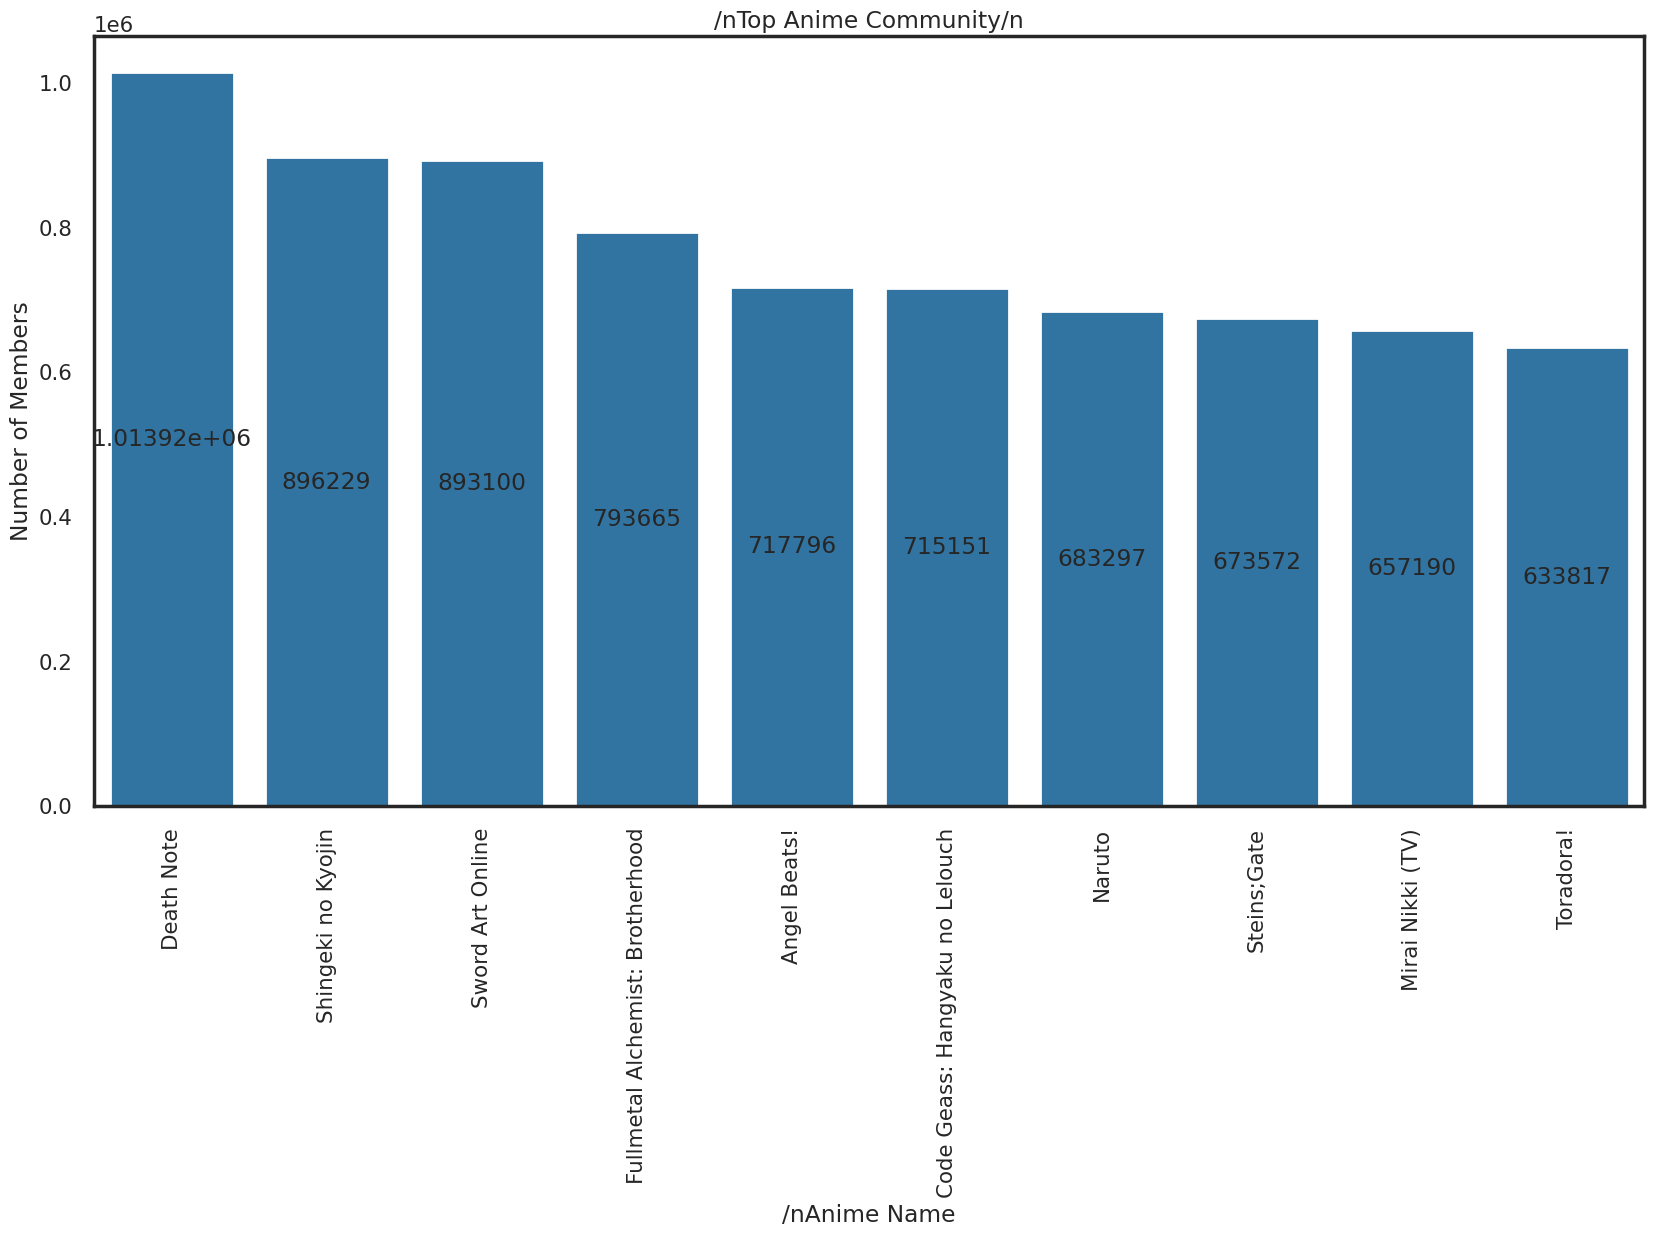

In [29]:
plt.subplots(figsize=(20,10))
plot=sns.barplot( x=data1_.name[:10], y = data1_.members,  order=data1_.name[:10])
plot.axes.set_title('/nTop Anime Community/n')
plt.xlabel('/nAnime Name')
plt.ylabel('Number of Members')
plt.xticks(rotation=90)
for container in plot.containers:
    plot.bar_label(container, label_type='center')
plt.show()

Top 10 larget anime communities have been displayed.
*  Here, we see that the largest anime community is that of Death Note followed by Shingeki No Kyojin.



In [30]:
data1_['type'].value_counts()

,count
type,
TV,2249
OVA,1468
Special,944
Movie,814
ONA,194
Music,84


Now we see the distributions of the number of types of anime.

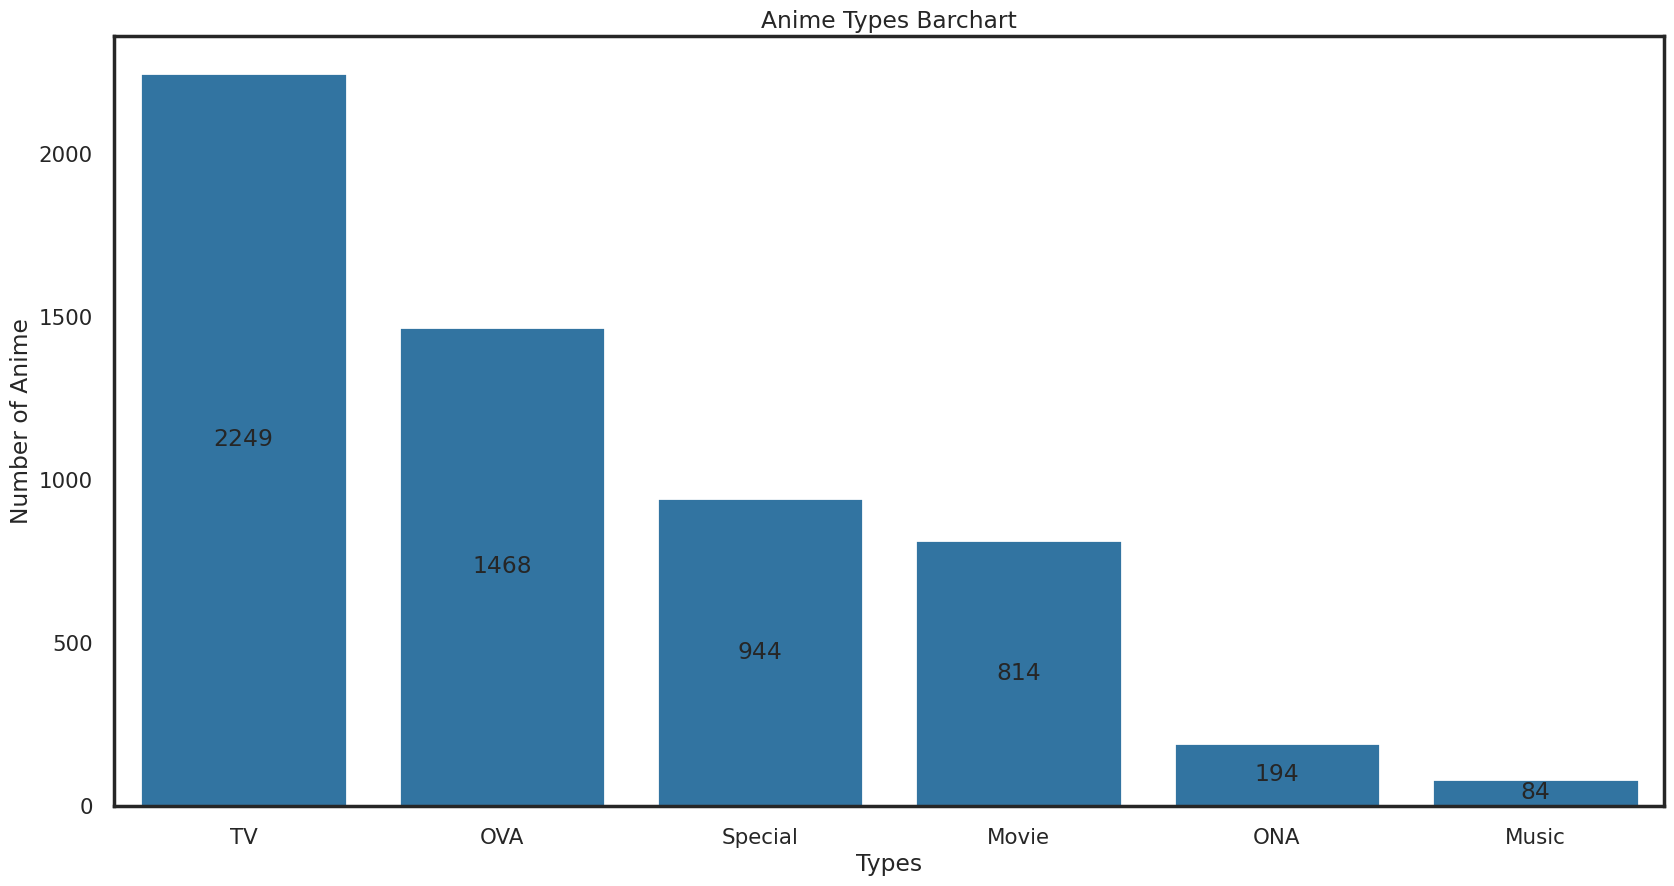

In [31]:
plt.subplots(figsize=(20,10))
p=sns.countplot(x=data1_['type'], order = data1_['type'].value_counts().index)
p.axes.set_title('Anime Types Barchart')
plt.xlabel('Types')
plt.ylabel('Number of Anime')
for container in p.containers:
    p.bar_label(container, label_type="center")
plt.show()

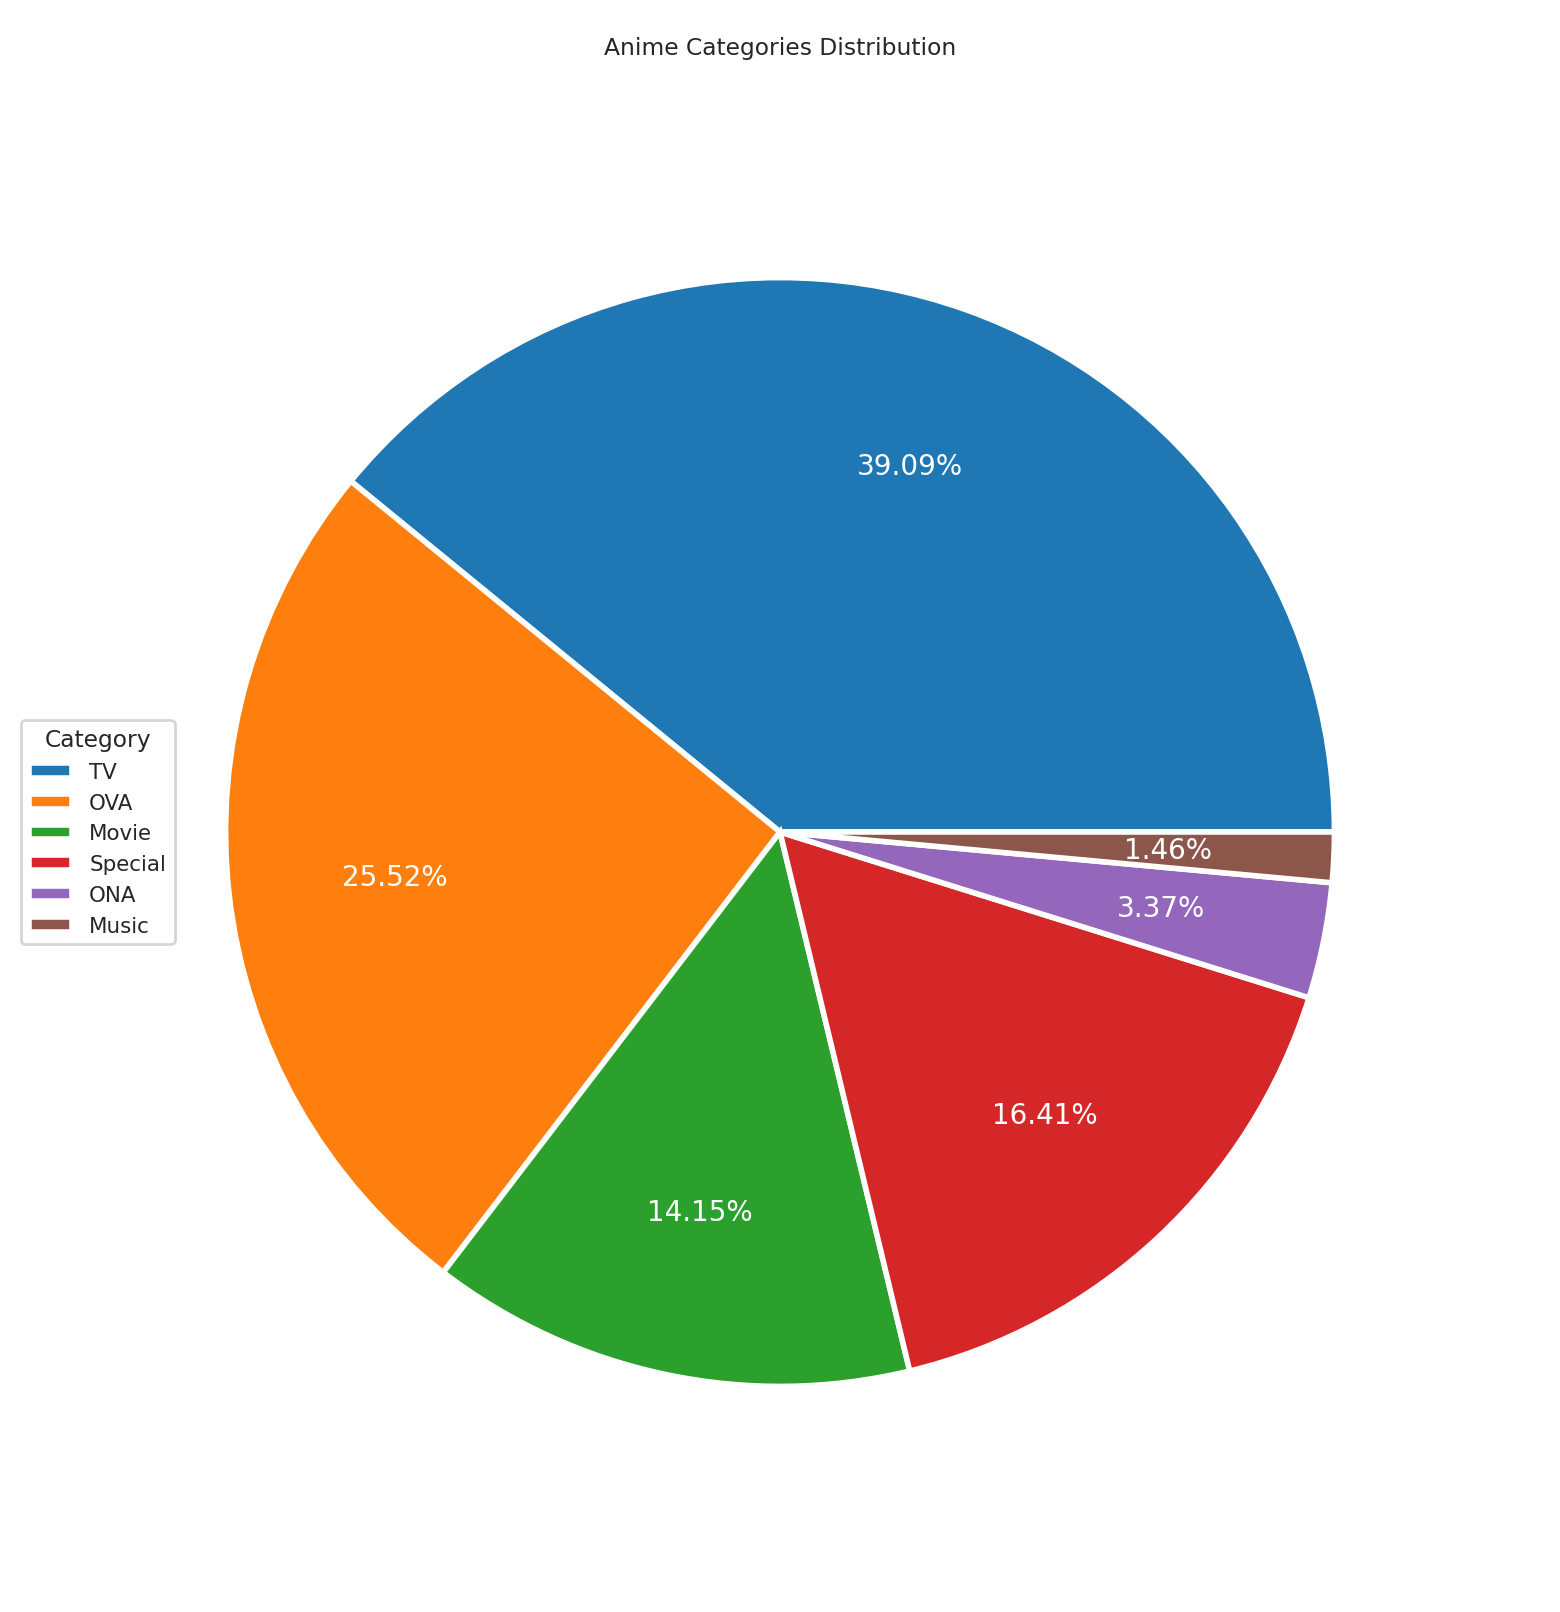

In [33]:
plt.subplots(figsize=(20,20))
labels=['TV', 'OVA', 'Movie','Special', 'ONA', 'Music']
wedges, texts, autotexts = plt.pie([len(data1_[data1_["type"]=="TV"]["type"]),
                                    len(data1_[data1_["type"]=="OVA"]["type"]),
                                    len(data1_[data1_["type"]=="Movie"]["type"]),
                                    len(data1_[data1_["type"]=="Special"]["type"]),
                                    len(data1_[data1_["type"]=="ONA"]["type"]),
                                    len(data1_[data1_["type"]=="Music"]["type"])],
                                    explode=(0, 0, 0, 0, 0, 0),
                                    textprops=dict(size=20, color="white"),
                                    autopct="%.2f%%",
                                    pctdistance=0.7,
                                    radius=0.9,
                                    wedgeprops=dict(width=0.9, linewidth=4),
                                    startangle=0)

plt.legend(wedges, labels, title="Category",loc="center left")
plt.title("\nAnime Categories Distribution")
plt.show()

Here, we see that

*  Anime of type- 'TV' are the most with 2249 shows comprising 39.09% of the dataset.
*  Next, Anime of type- 'OVA' with 1468 shows comprises 25.52% of the dataset.
*  Next, Anime of type- 'Special' with 944 shows comprises 16.41% of the dataset.
*  Next, Anime of type- 'Movie' with 814 shows comprises 14.15% of the dataset.
*  Next, Anime of type- 'ONA' with 194 shows comprises 3.37% of the dataset.
*  Next, Anime of type- 'Music' with 84 shows comprises 1.46% of the dataset.






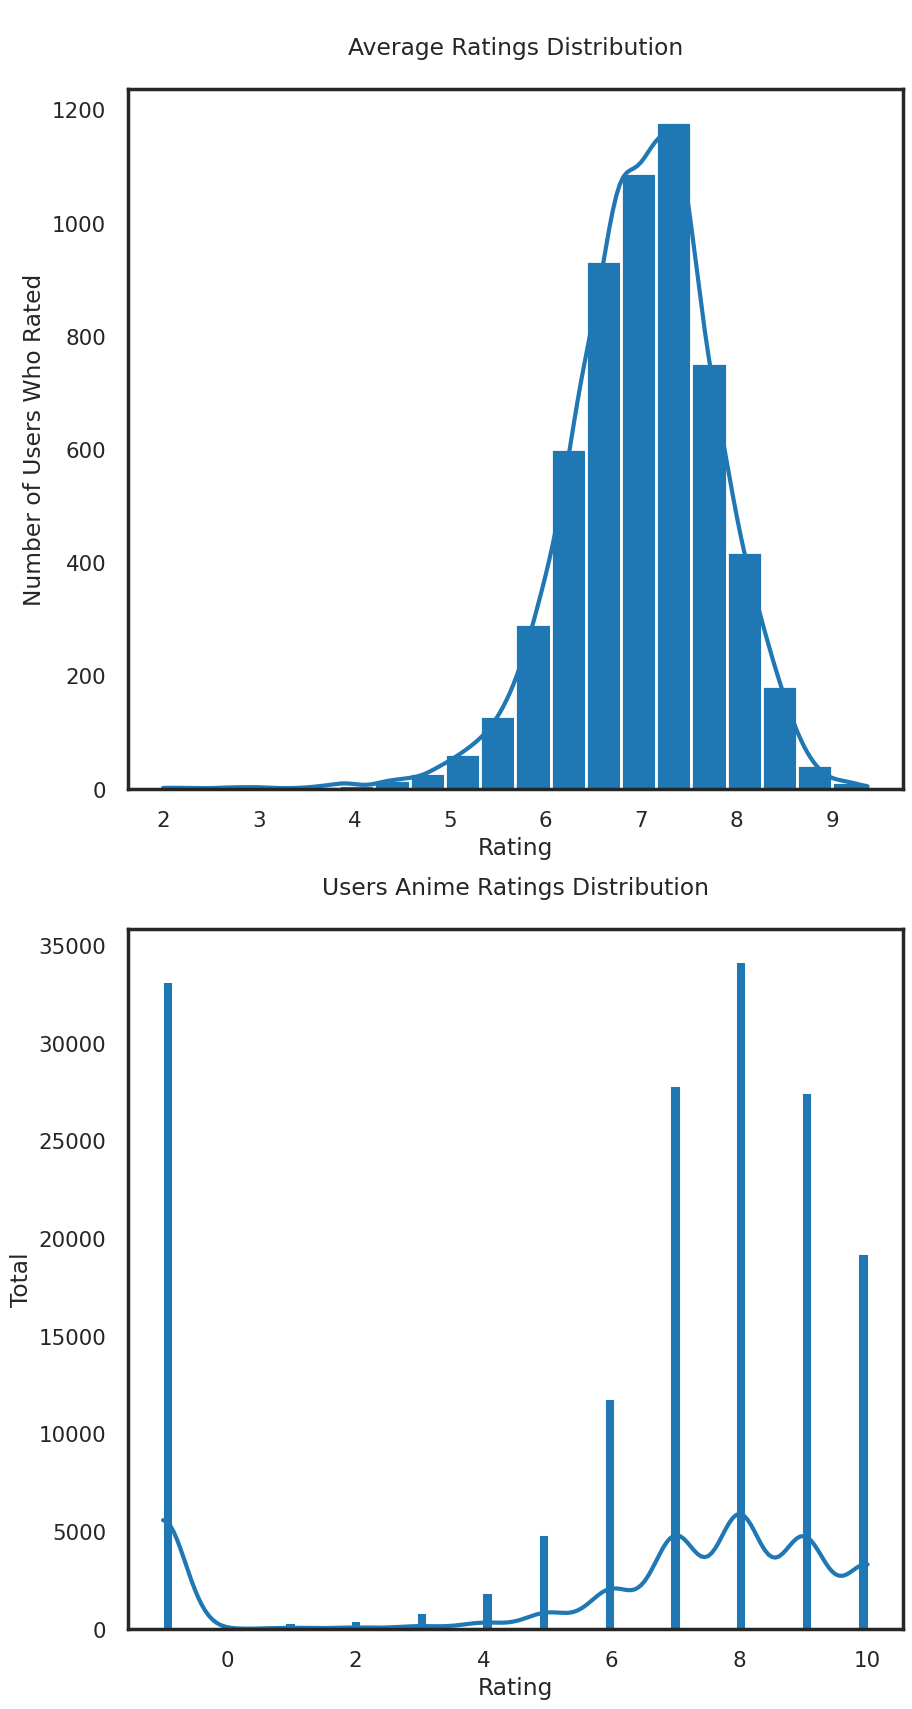

In [45]:
data2=data1.sort_values(["rating"],ascending=False)

_, axs=plt.subplots(2,1,figsize=(10,20),sharex=False,sharey=False)

sns.histplot(data2["rating"],kde=True,ax=axs[0],bins=20,alpha=1,fill=True)
axs[0].set_title("\nAverage Ratings Distribution\n")
axs[0].set_xlabel("Rating\n")
axs[0].set_ylabel("Number of Users Who Rated")

sns.histplot(data['user_rating'],kde=True, alpha=1,fill=True)
axs[1].set_title("\n\n\nUsers Anime Ratings Distribution\n")
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")
plt.show()

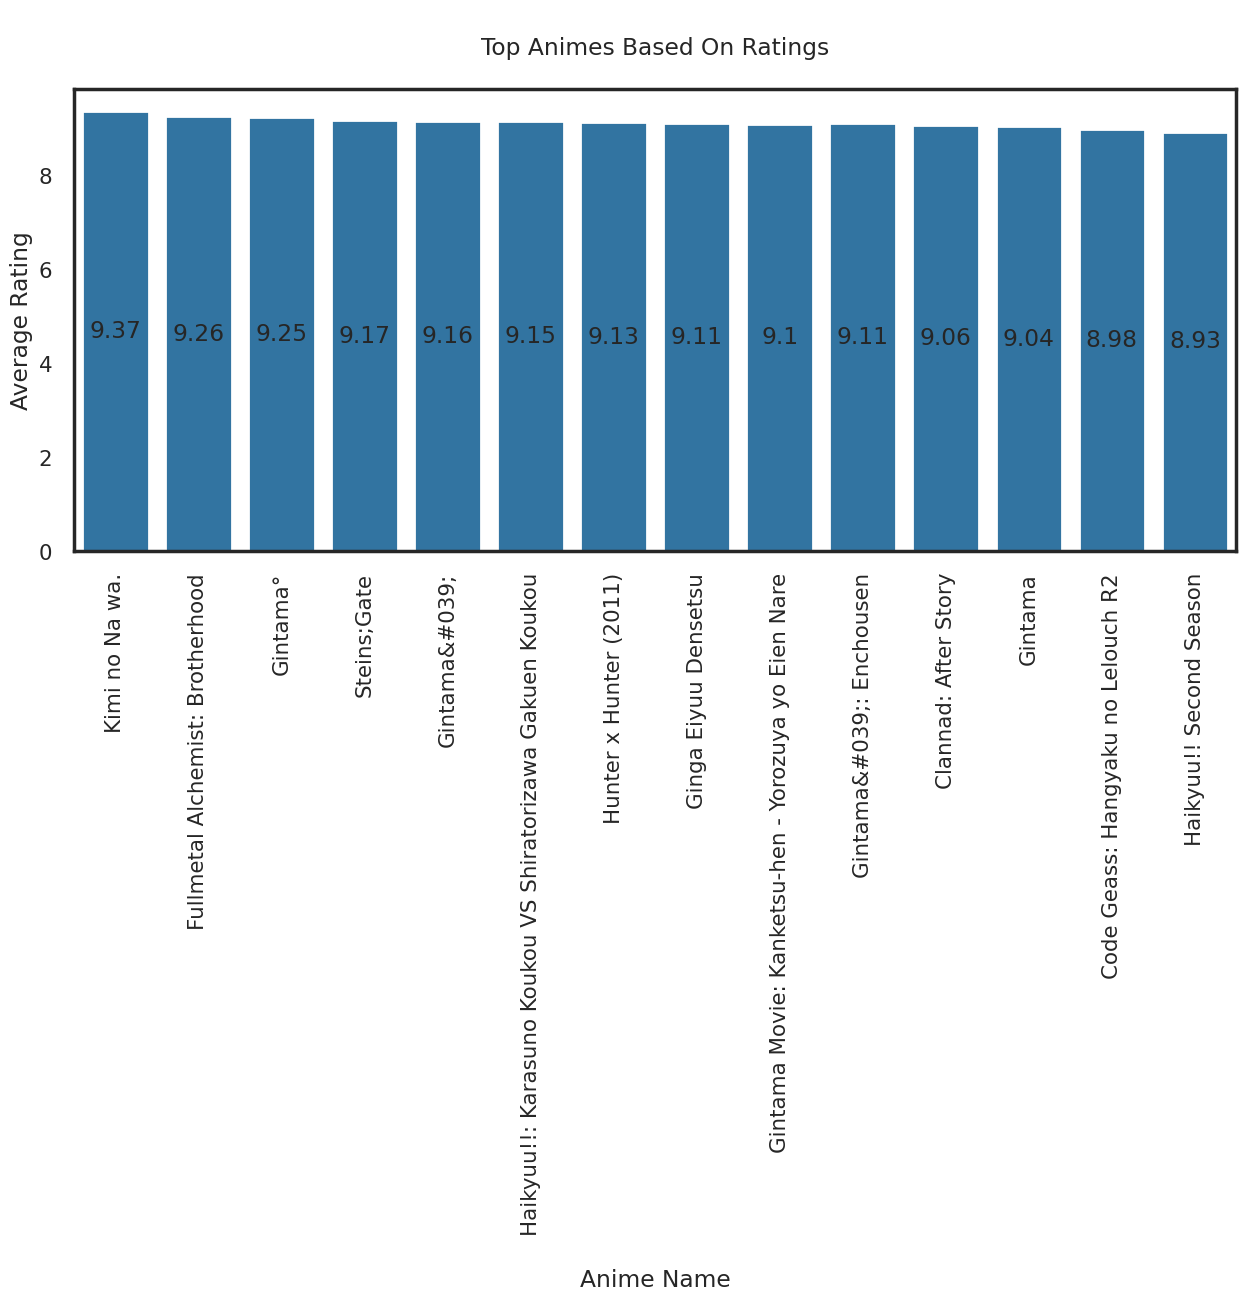

In [48]:
plt.subplots(figsize=(15,6))
p = sns.barplot(x=data2["name"][:14],y=data2["rating"])
p.axes.set_title("\nTop Animes Based On Ratings\n")
plt.ylabel("Average Rating")
plt.xlabel("\nAnime Name")
plt.xticks(rotation = 90)
for container in p.containers:
    p.bar_label(container,label_type = "center")
plt.show()

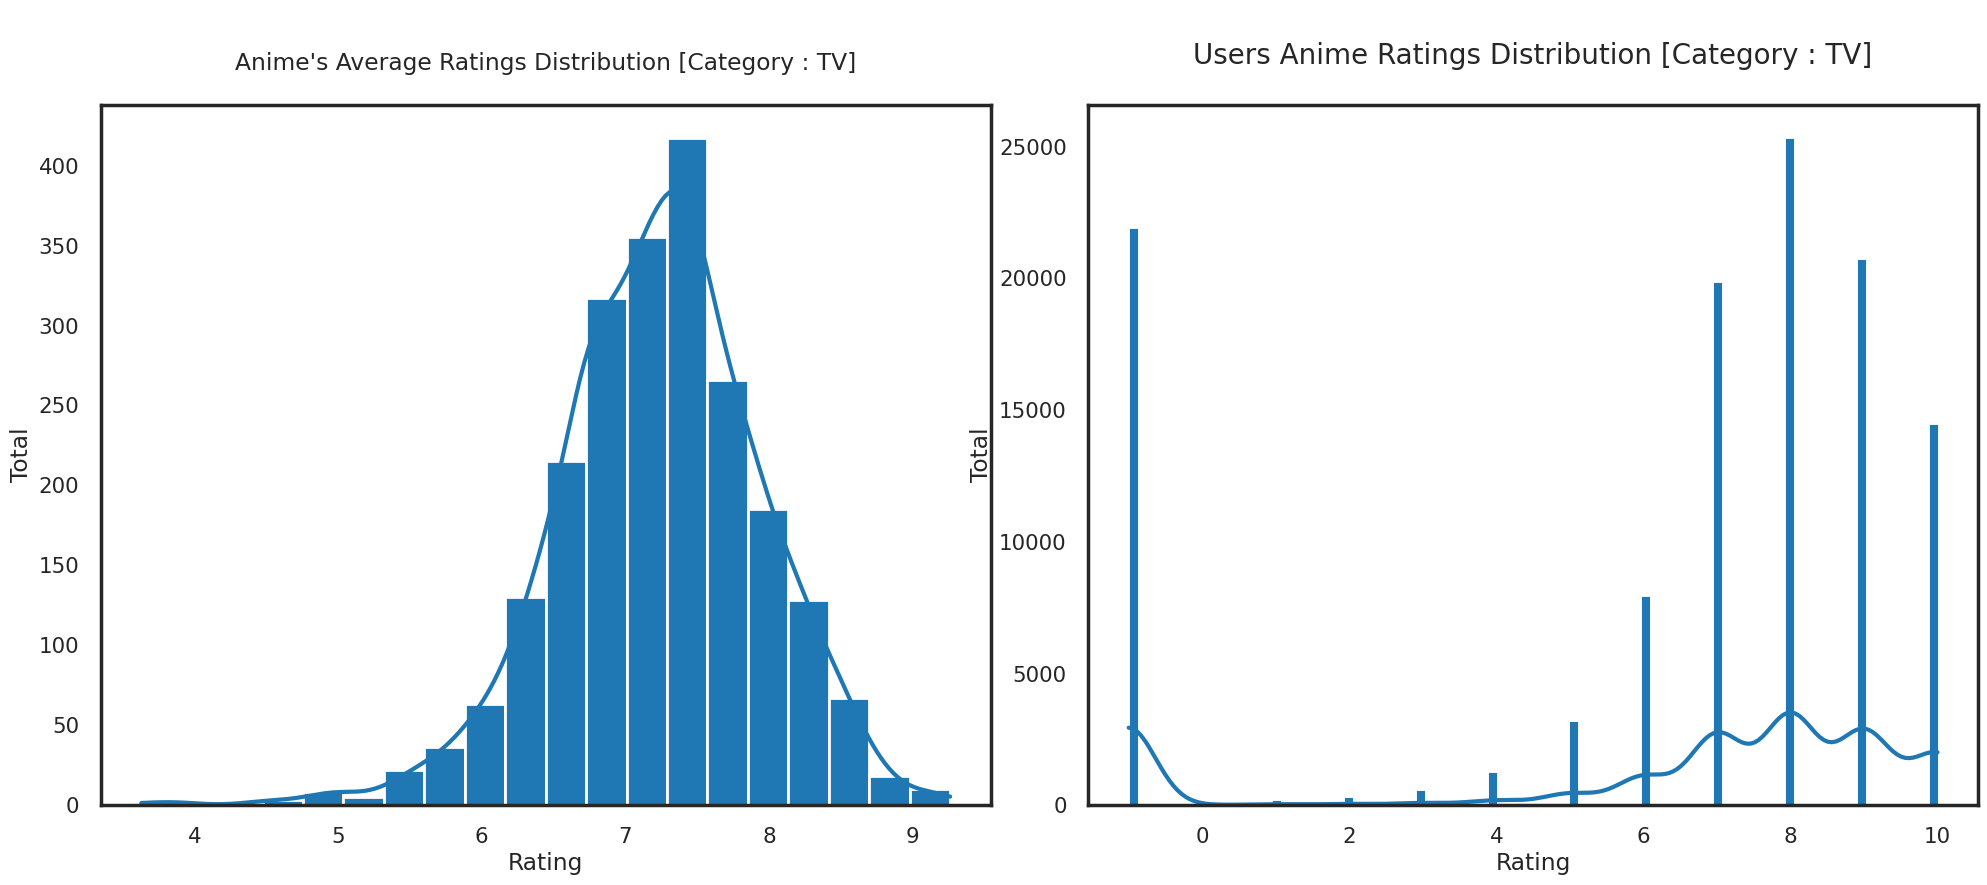

In [49]:
_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout()

sns.histplot(data2[data2["type"]=="TV"]["rating"],kde=True,ax=axs[0],bins=20,alpha=1,fill=True)
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : TV]\n")
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(data[data["type"]=="TV"]["user_rating"],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True)
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : TV]\n",fontsize=20)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")
plt.show()

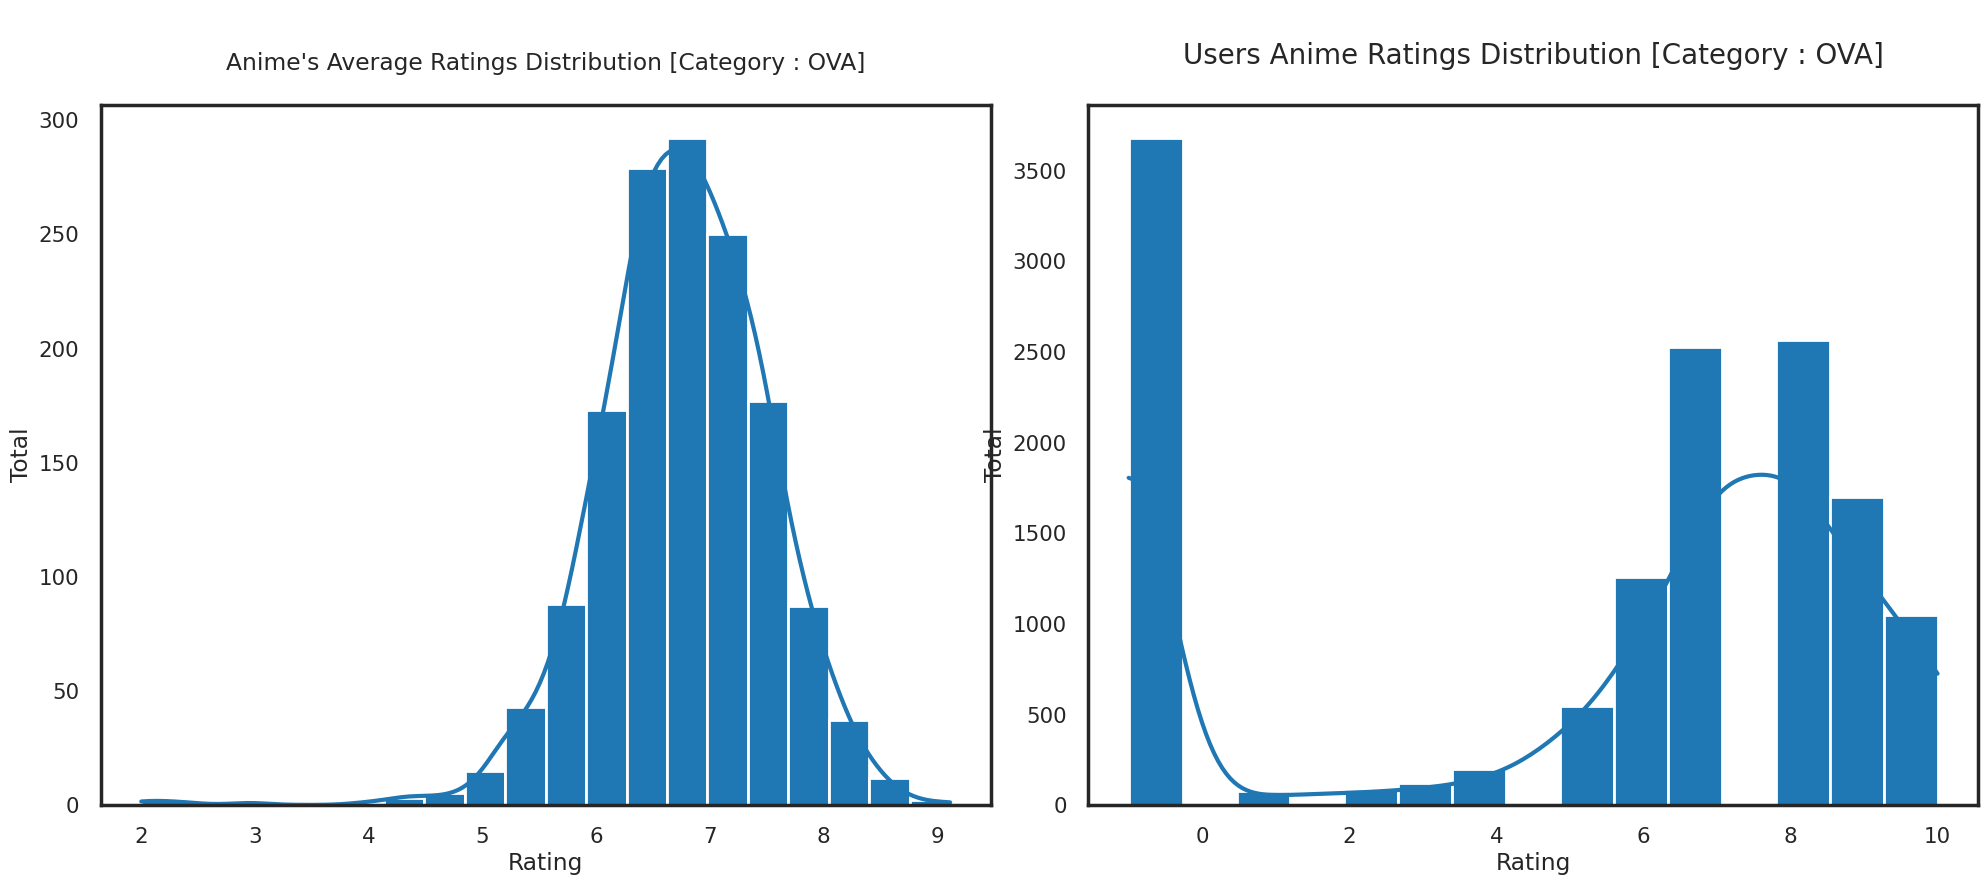

In [50]:
_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout()

sns.histplot(data2[data2["type"]=="OVA"]["rating"],kde=True,ax=axs[0],bins=20,alpha=1,fill=True)
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : OVA]\n")
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(data[data["type"]=="OVA"]["user_rating"],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True)
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : OVA]\n",fontsize=20)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")
plt.show()

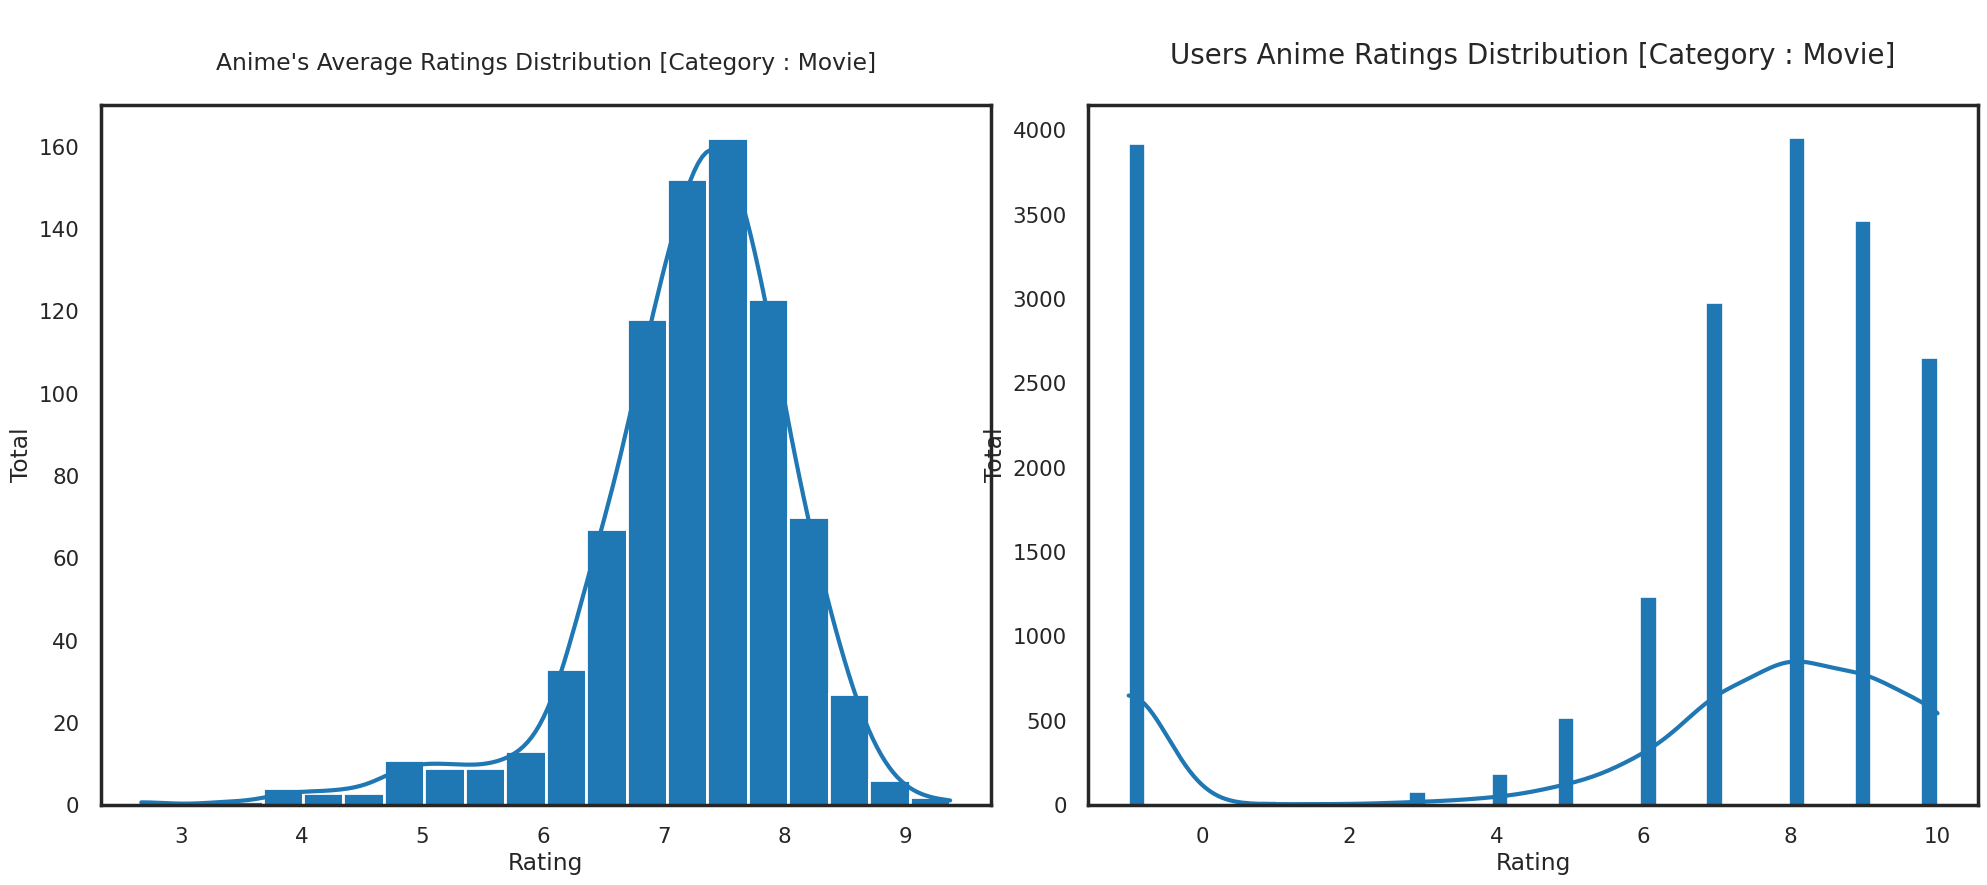

In [51]:
_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout()

sns.histplot(data2[data2["type"]=="Movie"]["rating"],kde=True,ax=axs[0],bins=20,alpha=1,fill=True)
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : Movie]\n")
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(data[data["type"]=="Movie"]["user_rating"],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True)
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : Movie]\n",fontsize=20)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")
plt.show()

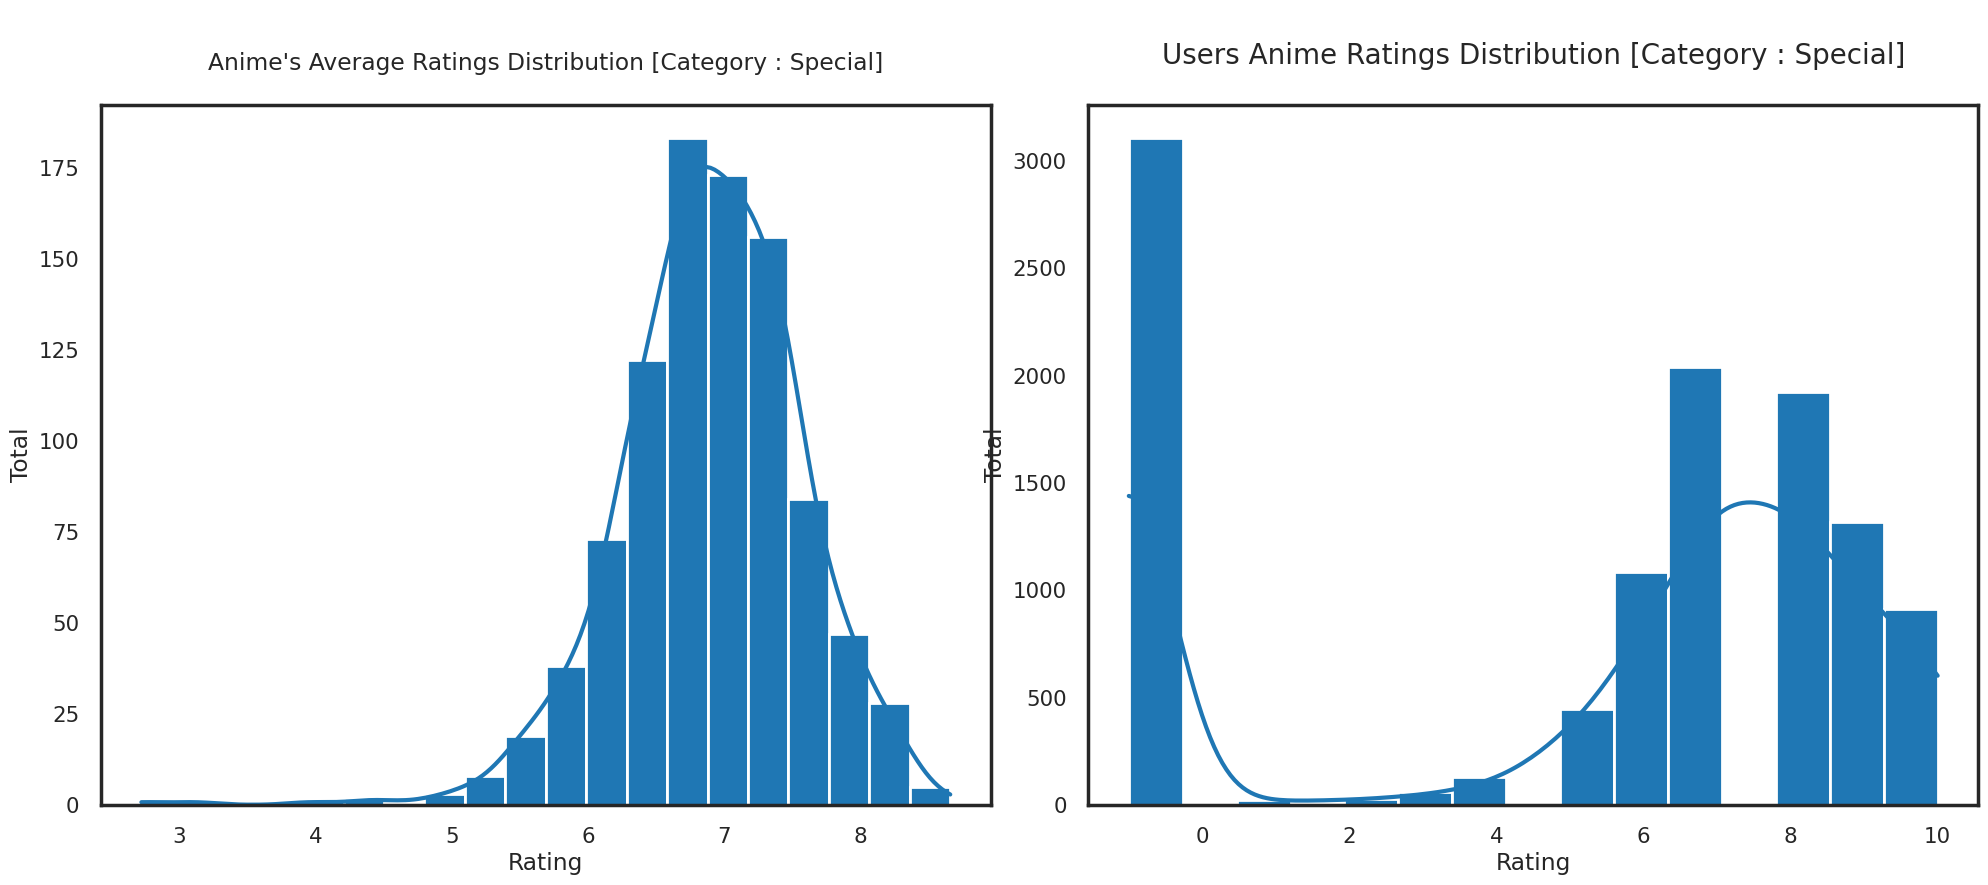

In [52]:
_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout()

sns.histplot(data2[data2["type"]=="Special"]["rating"],kde=True,ax=axs[0],bins=20,alpha=1,fill=True)
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : Special]\n")
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(data[data["type"]=="Special"]["user_rating"],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True)
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : Special]\n",fontsize=20)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")
plt.show()

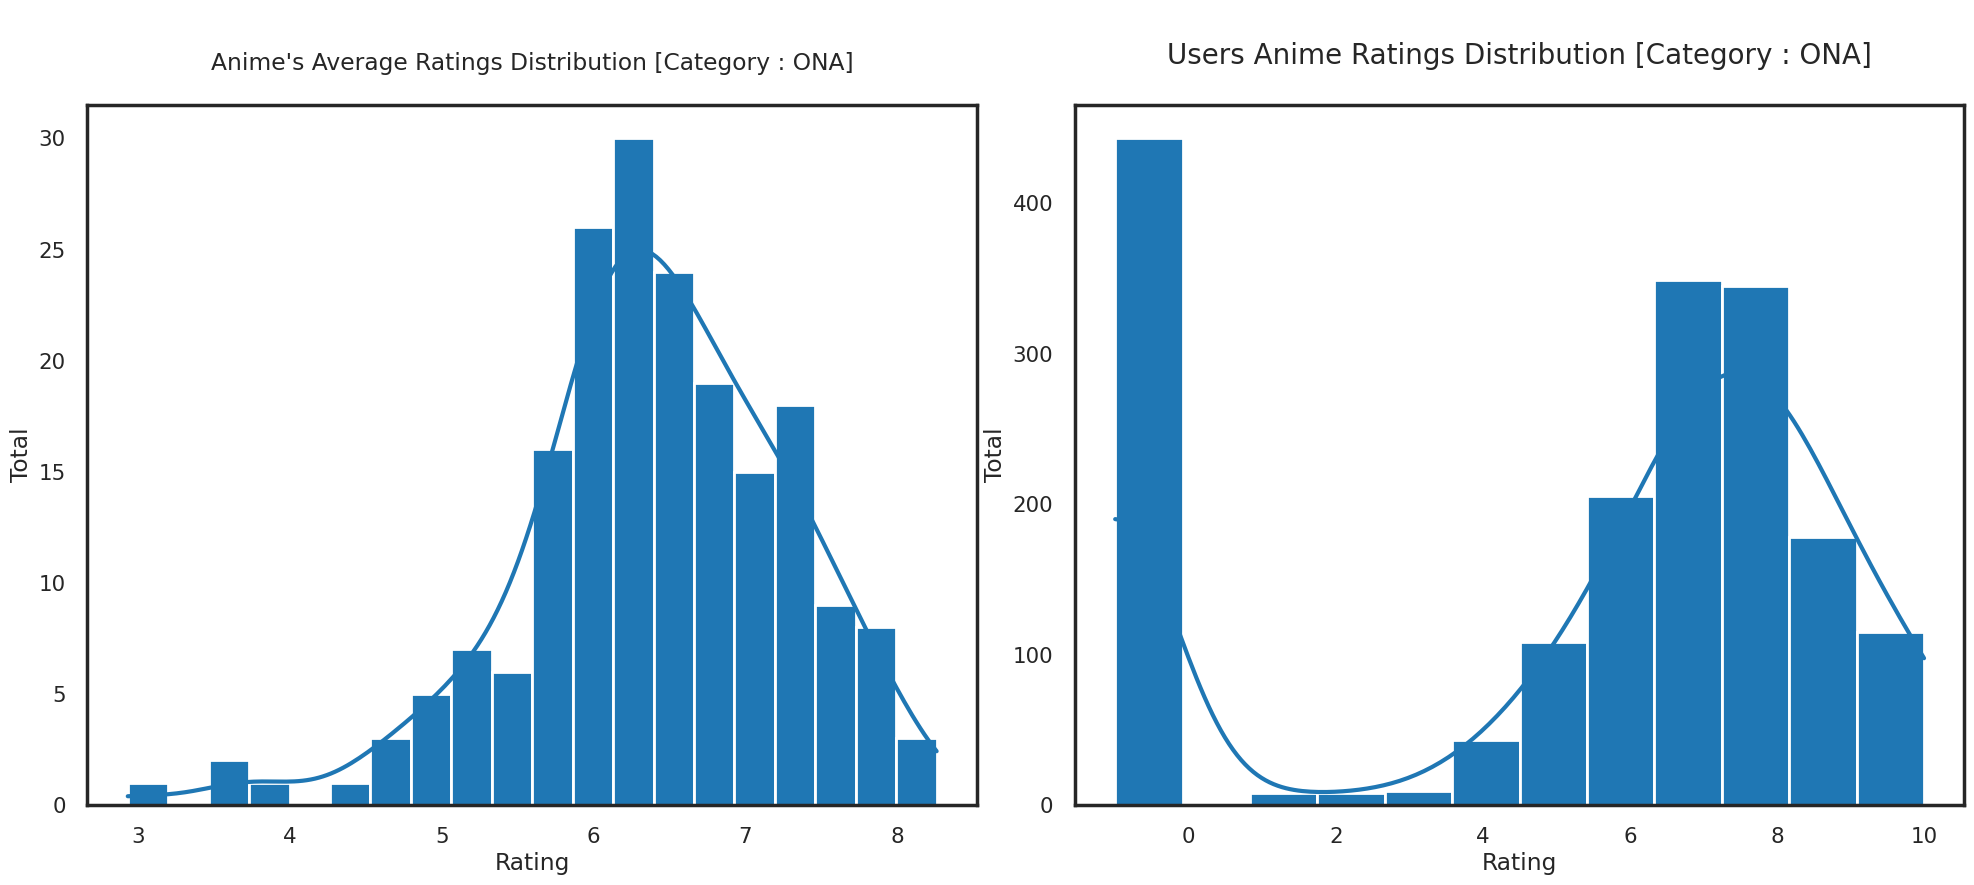

In [53]:
_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout()

sns.histplot(data2[data2["type"]=="ONA"]["rating"],kde=True,ax=axs[0],bins=20,alpha=1,fill=True)
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : ONA]\n")
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(data[data["type"]=="ONA"]["user_rating"],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True)
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : ONA]\n",fontsize=20)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")
plt.show()

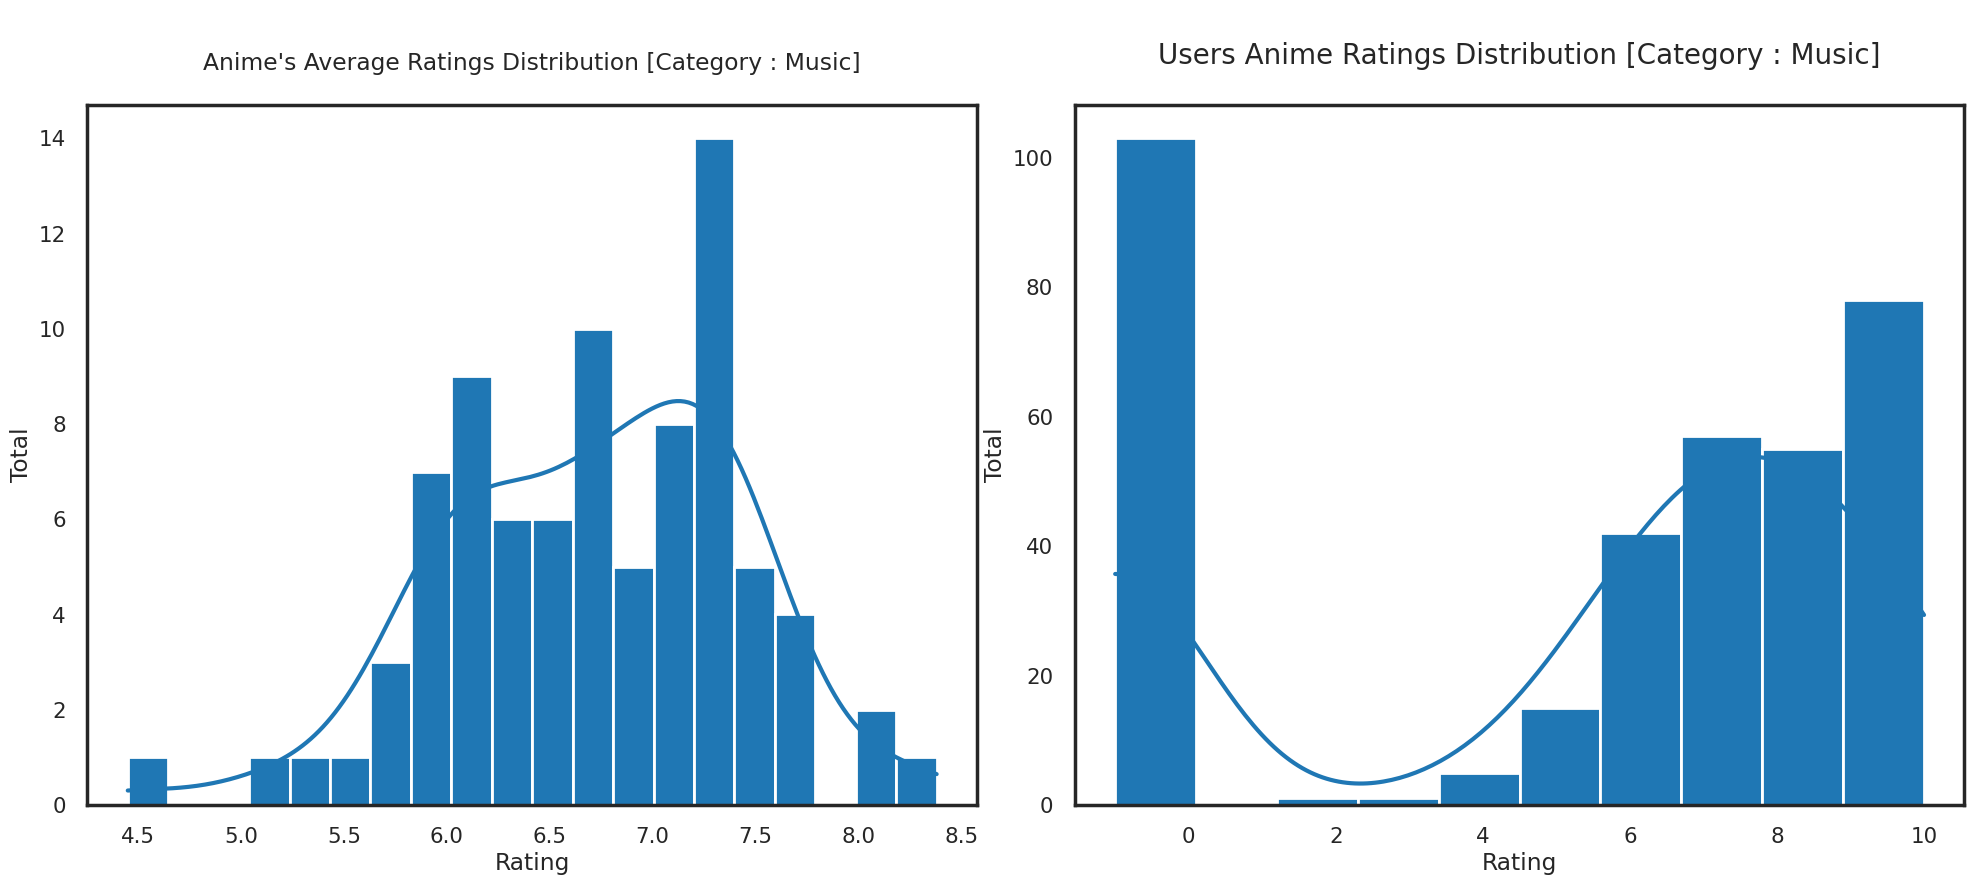

In [54]:
_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout()

sns.histplot(data2[data2["type"]=="Music"]["rating"],kde=True,ax=axs[0],bins=20,alpha=1,fill=True)
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : Music]\n")
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(data[data["type"]=="Music"]["user_rating"],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True)
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : Music]\n",fontsize=20)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")
plt.show()

In [58]:
data3=data[["genre"]].copy()
data3["genre"] = data3["genre"].str.split(", | , | ,")
data3 = data3.explode("genre")
data3["genre"] = data3["genre"].str.title()

len(data3["genre"].unique())

43

In [59]:
print(f'Occurances of unique genres :')
data3["genre"].value_counts().to_frame().T

Occurances of unique genres :


genre,Comedy,Action,Romance,School,Supernatural,Fantasy,Drama,Shounen,Adventure,Sci-Fi,...,Kids,Samurai,Shoujo Ai,Josei,Hentai,Dementia,Shounen Ai,Yaoi,Cars,Yuri
count,81099,69533,51421,43390,43344,42712,39607,39542,32052,30348,...,2563,2086,1413,1331,1312,1125,988,386,311,117


In [60]:
fulldata=data.copy()

In [61]:
fulldata['user_rating'].replace(to_replace = -1 , value = np.nan ,inplace=True)
fulldata= fulldata.dropna(axis = 0)
print("Null values after final pre-processing :")
fulldata.isna().sum().to_frame().T

Null values after final pre-processing :


,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
0,0,0,0,0,0,0,0,0,0


In [62]:
selected_users = fulldata["user_id"].value_counts()
fulldata = fulldata[fulldata["user_id"].isin(selected_users[selected_users >= 40].index)]

In [63]:
fulldata1 = fulldata.pivot_table(index="name",columns="user_id",values="user_rating").fillna(0)
fulldata1.head()

user_id,3,5,7,11,14,17,21,23,24,27,...,1589,1590,1591,1592,1594,1595,1596,1600,1601,1602
name,,,,,,,,,,,,,,,,,,,,,
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Memoire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Movie,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.hack//G.U. Returner,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.hack//G.U. Trilogy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
import re
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)

    return text

fulldata["name"] = fulldata["name"].apply(text_cleaning)

In [65]:
fulldata_pivot = fulldata.pivot_table(index="name",columns="user_id",values="user_rating").fillna(0)
print("Post cleaning, the pivot table looks like-")
fulldata_pivot.head()

Post cleaning, the pivot table looks like-


user_id,3,5,7,11,14,17,21,23,24,27,...,1589,1590,1591,1592,1594,1595,1596,1600,1601,1602
name,,,,,,,,,,,,,,,,,,,,,
009 Re:Cyborg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
07-Ghost,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11eyes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11eyes Picture Drama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Collaborative Filtering
Here for this given dataset, we will use the NearestNeighbours Algorithm alongisde cosine similarity to build our collaborative filtering model.

In [75]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

fulldata_matrix = csr_matrix(fulldata_pivot.values)

model_knn = NearestNeighbors(metric = "cosine", algorithm = "brute")
model_knn.fit(fulldata_matrix)

query_no = np.random.choice(fulldata_pivot.shape[0])
print(f"We will find recommendation for the anime numbered {query_no} which is {fulldata_pivot.index[query_no]}.")
distances, indices = model_knn.kneighbors(fulldata_pivot.iloc[query_no,:].values.reshape(1, -1), n_neighbors = 11)

We will find recommendation for the anime numbered 744 which is Code Geass: Hangyaku no Lelouch.


In [76]:
no = []
name = []
distance = []
rating = []

for i in range(0, len(distances.flatten())):
    if i == 0:
        print(f"Recommendations for {fulldata_pivot.index[query_no]} viewers :\n")
    else:
        #  print(f"{i}: {data_pivot.index[indices.flatten()[i]]} , with distance of {distances.flatten()[i]}")
        no.append(i)
        name.append(fulldata_pivot.index[indices.flatten()[i]])
        distance.append(distances.flatten()[i])
        rating.append(*anime[anime["name"]==fulldata_pivot.index[indices.flatten()[i]]]["rating"].values)

dic = {"No" : no, "Anime Name" : name, "Rating" : rating}
recommendation = pd.DataFrame(data = dic)
recommendation.set_index("No", inplace = True)
recommendation

Recommendations for Code Geass: Hangyaku no Lelouch viewers :



,Anime Name,Rating
No,,
1,Code Geass: Hangyaku no Lelouch R2,8.98
2,Death Note,8.71
3,Fullmetal Alchemist: Brotherhood,9.26
4,Sword Art Online,7.83
5,Steins;Gate,9.17
6,Shingeki no Kyojin,8.54
7,Angel Beats!,8.39
8,Mirai Nikki (TV),8.07
9,Fate/Zero,8.51
